In [4]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from tqdm import tqdm
import ast
import seaborn as sns

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

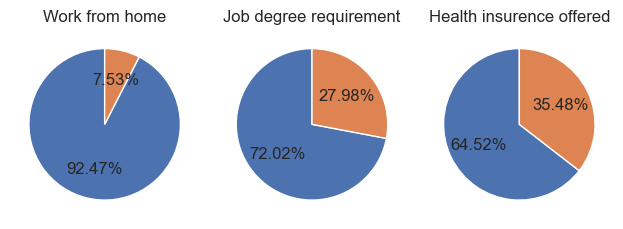

In [14]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job degree requirement',
    'job_health_insurance': 'Health insurence offered'
}

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),startangle=90,autopct='%.2f%%')
    ax[i].set_title(title)
    
plt.tight_layout()
plt.show()

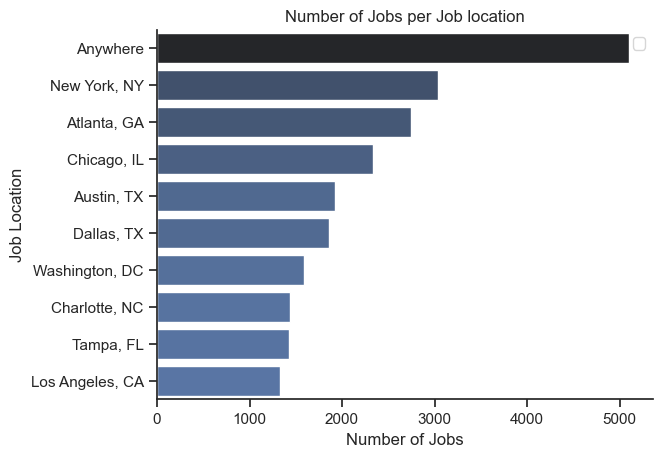

In [ ]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r')
sns.set_theme(style='ticks')
plt.legend('')
sns.despine()
plt.title('Number of Jobs per Job location')

plt.xlabel('Number of Jobs')
plt.ylabel('Job Location')
plt.show()

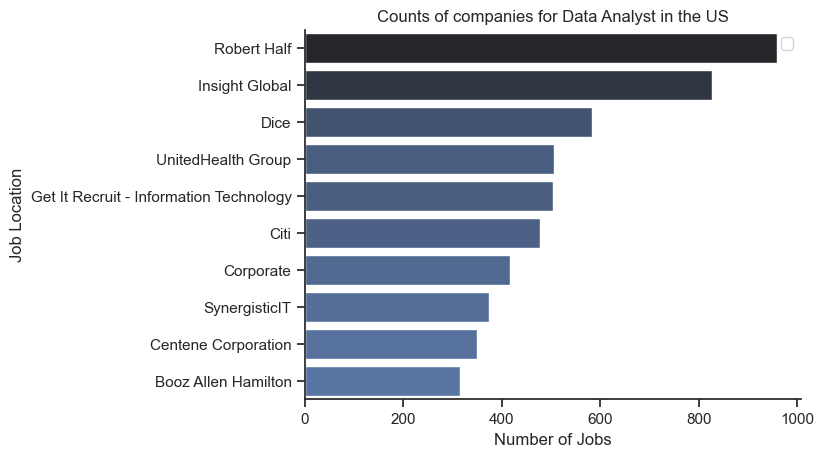

In [17]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r')
sns.set_theme(style='ticks')
plt.legend('')
sns.despine()
plt.title('Counts of companies for Data Analyst in the US')

plt.xlabel('Number of Jobs')
plt.ylabel('Job Location')
plt.show()